# Assignment 05


#### 1. Training Data

- load the training data file ('data.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$




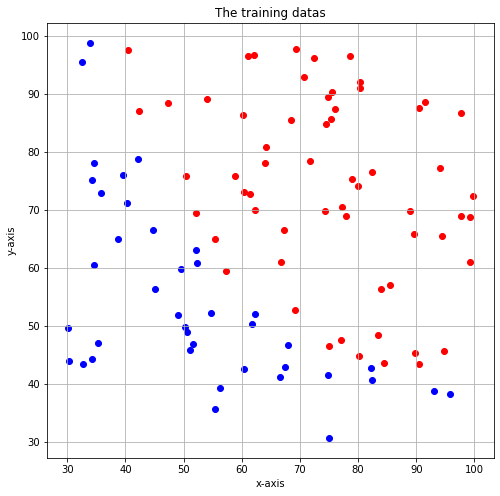

In [46]:
import matplotlib.pyplot as plt
import numpy as np

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=1, c='b')
plt.scatter(x_label1, y_label1, alpha=1, c='r')

plt.title('The training datas')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()

plt.show()

#### 2. Logistic regression

- $\hat{h} = \sigma(z)$ 
- $z = \theta_0 + \theta_1 x + \theta_2 y$, where $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 3. Objective Function

- $J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$

#### 4. Gradient Descent

- $\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$
- Choose a learning rate $\alpha=0.0001$ 
- Use initial $(\theta_0^{(0)}=-50, \theta_1^{(0)}=1, \theta_2^{(0)}=2)$
 


In [44]:
def Sigma(z):
    return 1.0 / (1 + np.exp(-z))

def Z(x, y, theta0, theta1, theta2):
    return theta0 + theta1*x + theta2*y

print("Define function completed!")

Define function completed!


#### 5. Training

- Using the training data to find optimal parameters $(\theta_0, \theta_1, \theta_2)$ 


In [71]:
theta0 = -50
theta1 = 1
theta2 = 2

col_theta0 = []
col_theta1 = []
col_theta2 = []
col_J = []

col_theta0.append(theta0)
col_theta1.append(theta1)
col_theta2.append(theta2)

m = len(x)
alpha = 0.0001

for iteration in range(10000):
    total_theta0 = 0
    total_theta1 = 0
    total_theta2 = 0
    total_J = 0
    
    for i in range(m):
        total_theta0 += Sigma(Z(x[i], y[i], theta0, theta1, theta2)) - label[i]
        total_theta1 += (Sigma(Z(x[i], y[i], theta0, theta1, theta2)) - label[i])*x[i]
        total_theta2 += (Sigma(Z(x[i], y[i], theta0, theta1, theta2)) - label[i])*y[i]
        
        if label[i] == 0:
            total_J += - np.log(1 - Sigma(Z(x[i], y[i], theta0, theta1, theta2)))/m
             
        if label[i] == 1:
            total_J += - np.log(Sigma(Z(x[i], y[i], theta0, theta1, theta2)))/m
    
    theta0 = theta0 - alpha*total_theta0/m
    theta1 = theta1 - alpha*total_theta1/m
    theta2 = theta2 - alpha*total_theta2/m
    
    col_theta0.append(theta0)
    col_theta1.append(theta1)
    col_theta2.append(theta2)
    col_J.append(total_J)
 
print("Classification Completed!") 

c:\users\ains-sengly\github\venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


Classification Completed!


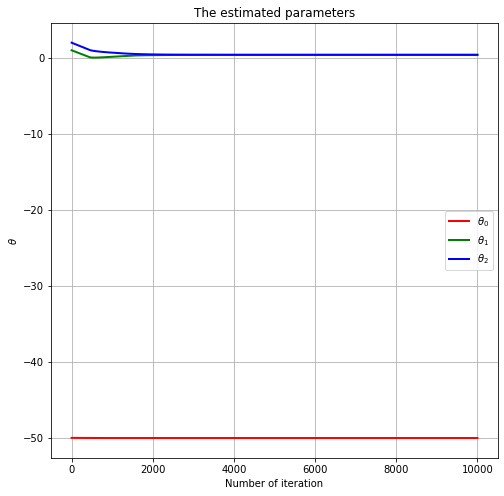

theta_0 = -50.0190
theta_1 = 0.4063
theta_2 = 0.4014


In [72]:
plt.figure(figsize=(8, 8))
plt.plot(col_theta0, 'r-', linewidth=2, markersize=5 )
plt.plot(col_theta1, 'g-', linewidth=2, markersize=5)
plt.plot(col_theta2, 'b-', linewidth=2, markersize=5)
plt.title('The estimated parameters')
plt.xlabel('Number of iteration')
plt.ylabel('$\\theta$')
plt.legend(['$\\theta_0$', '$\\theta_1$', '$\\theta_2$'])
plt.grid()
plt.show()

print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)
print('theta_2 = %.4f' % theta2)

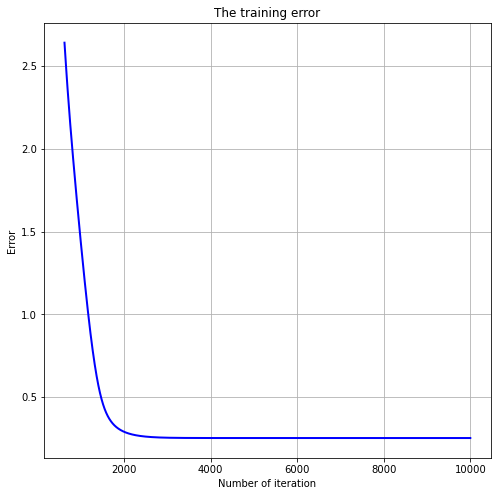

Error = 0.2525


In [73]:
plt.figure(figsize=(8, 8))
plt.plot(col_J, 'b-', linewidth=2, markersize=5)
plt.title('The training error')
plt.xlabel('Number of iteration')
plt.ylabel('Error')
plt.grid()
plt.show()

print('Error = %.4f' % total_J)

#### 6. Visualize Classifier

- visualize the obtained classifier with varying $x$ and $y$ values that range from the minimum to the maximum of the training data



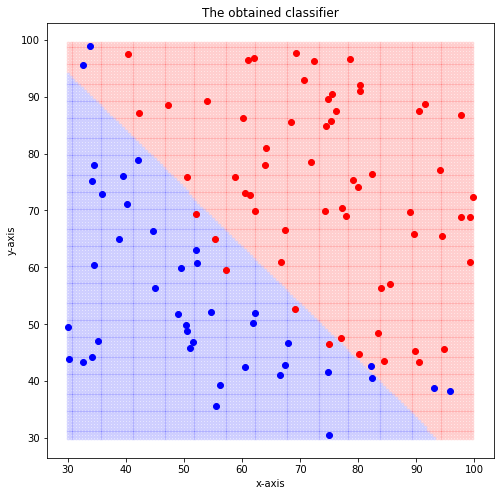

In [74]:
xx = yy = np.arange(30, 100, 0.5)
X1 = []; X2 = []; Y1 = []; Y2 = []

for i in xx:
    for j in yy:
        if theta1*i + theta2*j + theta0 > 0:
            X1.append(i)
            Y1.append(j)
        else:
            X2.append(i)
            Y2.append(j)
            
plt.figure(figsize=(8, 8))
plt.scatter(X1, Y1,marker='.', alpha=0.1, c='r')
plt.scatter(X2, Y2,marker='.', alpha=0.1, c='b')
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()
